Task Assignment by Sir Tariq

Student: Muhammad Ammar Jamshed 

In the datetime notebook, analyze the time difference between the time when the product was purchased 
(purchased_at) and the time when it was delivered (delivered_to_customer_on). 
Find out any anomalies in this time (as we did for the other time differences) and discover the ideal boxplot.

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [24]:
# To calculate the difference in qwhen the product was purchased an delivered we import the orders file data
df_ord = pd.read_csv(r"C:\Users\muham\Downloads\Orders2.Data.csv")

In [25]:
df_ord

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00


In [26]:
df_ord.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In order to answer the Question we need to calculate the difference between order_purchase_timestamp and 
order_delivered_customer_date

In [43]:
# we first rename the columns to make them more understandable
df_ord = df_ord.rename(columns = {'order_purchase_timestamp': 'Order_Purchased', 'order_delivered_customer_date': 'Recieved_by_customer'})

In [28]:
df_ord.head()

,order_id,customer_id,order_status,Order_Purchased,order_approved_at,order_delivered_carrier_date,Recieved_by_customer,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [32]:
# we now typecast both columns to datetime, in order to calculate their mean
df_ord['Order_Purchased'] = pd.to_datetime(df_ord['Order_Purchased'])
df_ord['Recieved_by_customer'] = pd.to_datetime(df_ord['Recieved_by_customer'])

 thus renaming is a success

In [33]:
# we now calculate the average difference between Order_Purchased and Recieved_by_customer
between_release_and_customer = df_ord['Order_Purchased'] - df_ord['Recieved_by_customer']
# we shall calculate in terms of hours by using 3600 secs as a base for a lambda function
between_release_and_customer.apply(lambda x: (x.total_seconds())/3600).mean()

-301.407813687681

here we can see an anomality as its showing that on average we are delivering the products to the customers 301 hours before 
the due date which is unrealistic

In [44]:
# we have to further examine the time differences between_release_and_customer
timediff = between_release_and_customer.apply(lambda x: (x.total_seconds())/3600)

In [45]:
time_check = pd.DataFrame(timediff,index = np.arange(len(timediff)),columns = ['timediff'])

In [46]:
# we here check thwe success of the file
time_check

,timediff
0,-202.483333
1,-330.766667
2,-225.466667
3,-317.000000
4,-68.983333
...,...
99436,-197.233333
99437,-532.650000
99438,-596.633333
99439,-410.066667


In [37]:
# we here check the first 100 rows
time_check.head(100)

,timediff
0,-202.483333
1,-330.766667
2,-225.466667
3,-317.000000
4,-68.983333
...,...
95,-327.833333
96,-102.216667
97,-872.183333
98,-259.150000


In [38]:
# Lets now check the shape and mean of the new file
time_check.mean()

timediff   -301.407814
dtype: float64

In [39]:
time_check.shape

(99441, 1)

In [63]:
print(time_check.shape)
print(time_check.mean())
# now we can check the time difference below between different starting points of time, using the total count 
# of 99441 rows as the base of time variances
# here we can check the time difference greater than 5 mins
print((((time_check.where(time_check['timediff'] > 5).count())/99441)*100))
# here we can check the time difference greater than 10 min
print((((time_check.where(time_check['timediff'] > 10).count())/99441)*100))
# here we can check the time difference greater than 15 minutes 
print((((time_check.where(time_check['timediff'] > 15).count())/99441)*100))
# here we can check the time difference greater than 100 minutes 
print((((time_check.where(time_check['timediff'] > 20).count())/99441)*100))
# Now lets check on -ve values
print((((time_check.where(time_check['timediff'] > -100).count())/99441)*100))
print((((time_check.where(time_check['timediff'] > -500).count())/99441)*100))
print((((time_check.where(time_check['timediff'] > -1000).count())/99441)*100))

(99441, 1)
timediff   -301.407814
dtype: float64
timediff    0.0
dtype: float64
timediff    0.0
dtype: float64
timediff    0.0
dtype: float64
timediff    0.0
dtype: float64
timediff    9.744472
dtype: float64
timediff    84.122243
dtype: float64
timediff    95.508895
dtype: float64


This poses a question, as to why there are no time differences despite their being a large variance 
between the date of expecting the order to be recieved and the date its actually recieved in
as we can only see differences in -ve values, showing time variances are ahhpppening before expectated deliveries and
delays are never experienced

thus its showing us that there are only time difference between negative intervals, so lets further test that


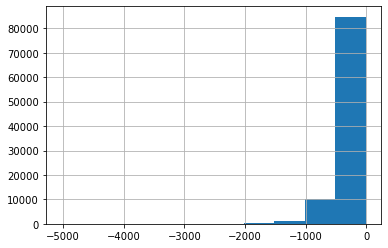

In [56]:
# we now lets check  the histogram for further evaluation, and mitigate the bious of a technical error in capturing the
# data
time_check['timediff'].hist()

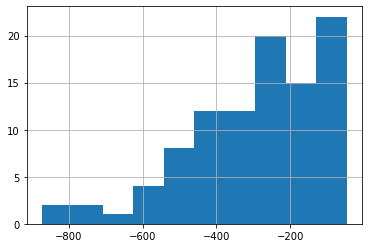

In [59]:
# we shall plot the first 100 rows to further evaluate this scenario
time_check = pd.DataFrame(timediff,index = np.arange(len(timediff)), columns = ['timediff'])
time_check['timediff'].head(100).hist()

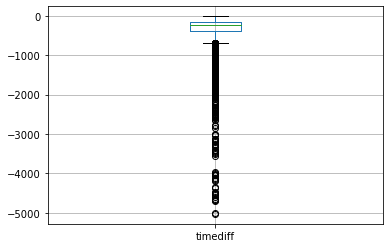

In [61]:
# We nowplot a boxplot to confirm this scenario
time_check.boxplot(column = 'timediff', sym ='o', return_type = 'axes')

Its now confirmed that this scnario is present and has completely skewed the data thus showing it to be very 
unreliable 
thus we need to figure out the right boxplot to atleast show some level of data normalization

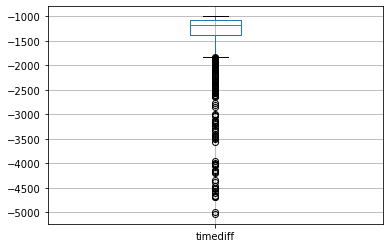

In [68]:
# since its hard to skip values in this densly skewed dataset, thus lets see at which
# points can we acheive less skeweness on less than - 1000
sub_check = time_check[time_check['timediff'] < - 1000]
sub_check.boxplot(column = 'timediff', sym ='o', return_type='axes')

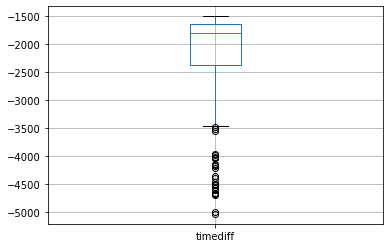

In [73]:
# thus we are acheiving better skeness here so lets test this further 
sub_check = time_check[time_check['timediff'] < - 1500]
sub_check.boxplot(column = 'timediff', sym = 'o', return_type='axes')

As we can see improvement in the distribution here, so we shall test further to see if we can acheive more accuracy

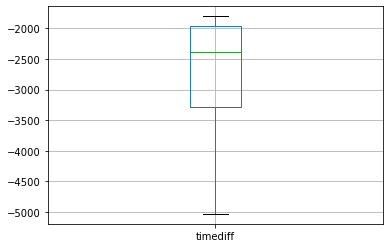

In [74]:
#less than - 1800
sub_check = time_check[time_check['timediff'] < - 1800]
sub_check.boxplot(column = 'timediff', sym = 'o', return_type='axes')

Thus we have achieved a cleaner a data normalization at less than - 1800